In [ ]:
library(tidyverse)
library(tidymodels)
library(repr)
library(RColorBrewer)

In [ ]:
# Set the seed for reproducibility
set.seed(7)


#importing heart disease data
process_data_cleveland<-read_delim("processed.cleveland.data", delim=",", col_names = FALSE)|>
rename(
    age = X1,
    sex = X2,
    cp=X3,
    trestbps = X4,
    chol = X5,
    fbs= X6, 
    restecg  =X7,
    thalach =X8,
    exang=X9,
    oldpeak=X10,
    slope=X11,
    ca =X12,
    thal=X13,
    num =X14)



# cleaning, wrangling data
process_data_cleveland[process_data_cleveland == "?" ] <- NA


#renaming Sex as Male or Female for better readability, Renaming CP (chest pain type)
cleveland_data_renamed<-process_data_cleveland|>
                    mutate(diagnosis=ifelse(is.na(num),NA,(num > 0)))|>
                    mutate(sex= as.factor(sex),
                           cp= as.factor(cp), 
                           fbs= as.factor(fbs),
                           restecg= as.factor(restecg),
                           exang= as.factor(exang),
                           thal= as.factor(thal),
                           ca= as.factor(ca),
                           slope= as.factor(slope), 
                           diagnosis=as.factor(diagnosis))|>
                    mutate(sex= fct_recode(sex,"Male" = "1", "Female" = "0"))|>
                    mutate(cp= fct_recode(cp,"Typical Angina"="1", "Atypical Angina"="2","Non-Anginal Pain"="3","Asymptomatic"="4"))|>
                    mutate(severity=num)|>
                    select(-num)

cleveland_data_renamed

In [74]:
cleveland_split <- initial_split(cleveland_data_renamed, prop = 3/4, strata = diagnosis)

cleveland_training <- training(cleveland_split)
cleveland_testing <- testing(cleveland_split)
head(cleveland_training)
     

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,diagnosis,severity
<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>,<dbl>
63,Male,Typical Angina,145,233,1,2,150,0,2.3,3,0.0,6.0,FALSE,0
41,Female,Atypical Angina,130,204,0,2,172,0,1.4,1,0.0,3.0,FALSE,0
56,Male,Atypical Angina,120,236,0,0,178,0,0.8,1,0.0,3.0,FALSE,0
57,Female,Asymptomatic,120,354,0,0,163,1,0.6,1,0.0,3.0,FALSE,0
57,Male,Asymptomatic,140,192,0,0,148,0,0.4,2,0.0,6.0,FALSE,0
56,Female,Atypical Angina,140,294,0,2,153,0,1.3,2,0.0,3.0,FALSE,0


In [86]:
#summarizing to get min, max, mean of each predictor + total no. of rows per class
cleveland_summary <- cleveland_training |>
                    group_by(diagnosis) |>
                    summarize(
                              min_chol = min(chol), max_chol = max(chol), mean_chol = mean(chol), 
                              min_thalach = min(thalach), max_thalach = max(thalach), mean_thalach = mean(thalach), 
                              min_trestbps = min(trestbps), max_trestbps = max(trestbps), mean_trestbps = mean(trestbps),
                              n_of_patients = n())

cleveland_summary

diagnosis,min_chol,max_chol,mean_chol,min_thalach,max_thalach,mean_thalach,min_trestbps,max_trestbps,mean_trestbps,n_of_patients
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
FALSE,126,564,246.7886,96,202,158.2764,94,180,129.4309,123
TRUE,131,409,256.8558,71,177,137.2981,100,200,133.5192,104


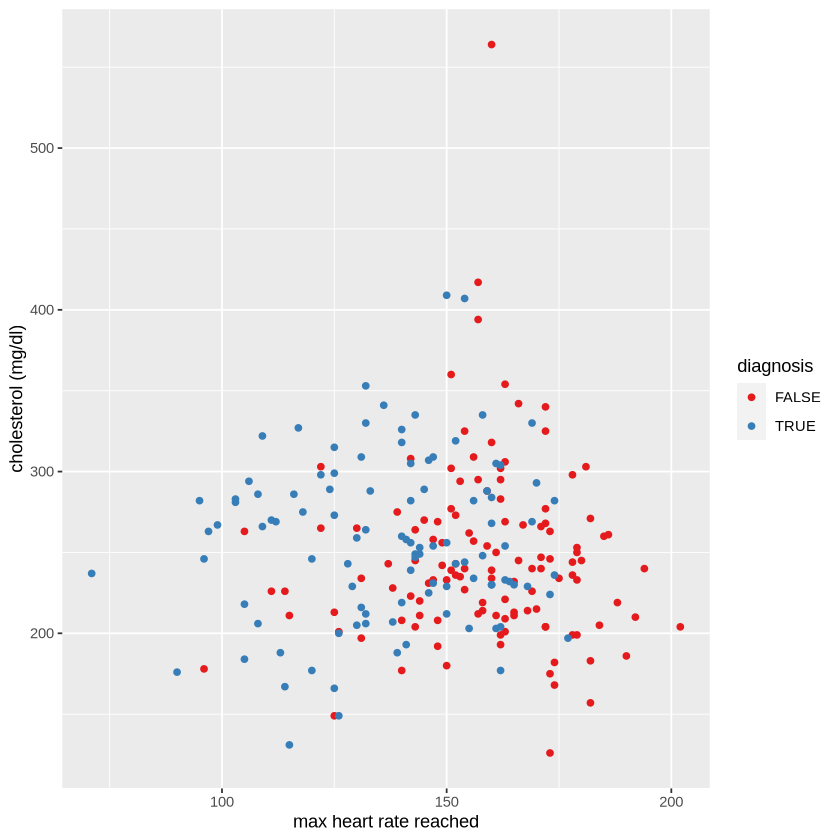

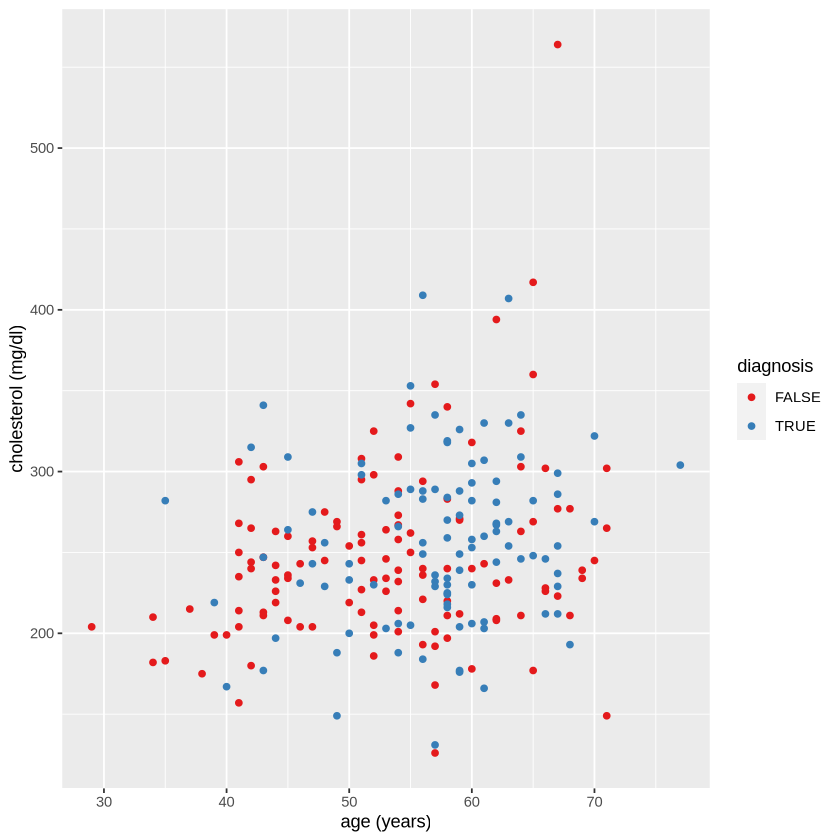

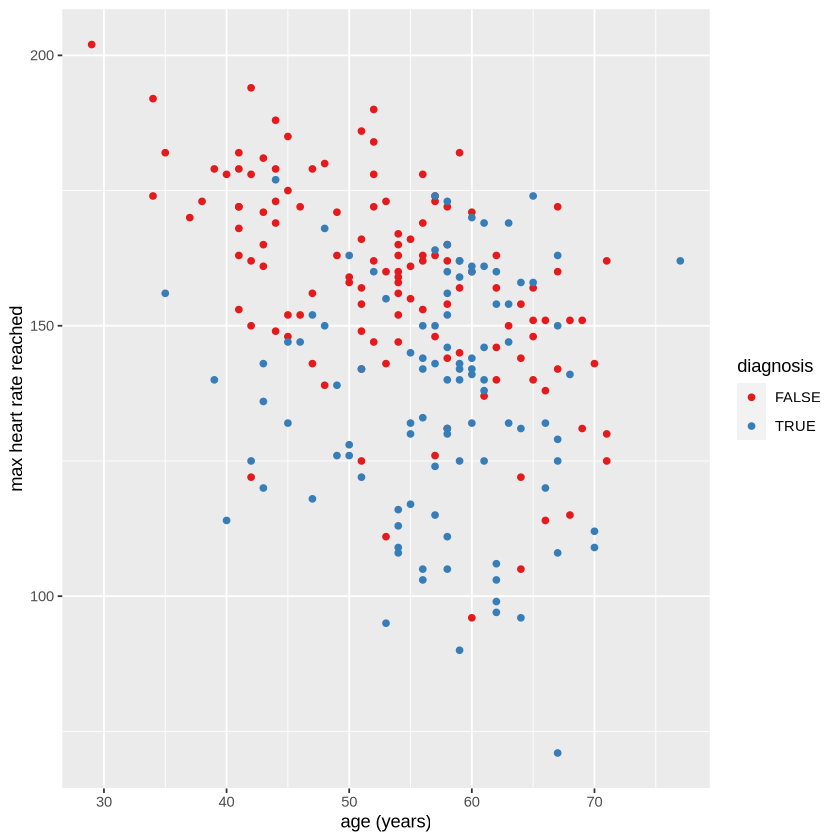

In [90]:
plot1 <- ggplot(cleveland_training, aes(x = thalach, y = chol, color = diagnosis)) +
                 geom_point() +
                 labs(x = "max heart rate reached", y = "cholesterol (mg/dl)", color = "diagnosis") +
                 scale_color_brewer(palette = "Set1")

plot2 <- ggplot(cleveland_training, aes(x = age, y = chol, color = diagnosis)) +
                 geom_point() +
                 labs(x = "age (years)", y = "cholesterol (mg/dl)", color = "diagnosis") +
                 scale_color_brewer(palette = "Set1")

plot3 <- ggplot(cleveland_training, aes(x = age, y = thalach, color = diagnosis)) +
                 geom_point() +
                 labs(x = "age (years)", y = "max heart rate reached", color = "diagnosis") +
                 scale_color_brewer(palette = "Set1")

plot1
plot2
plot3